In [102]:
import pandas as pd

# Create the data with self explainary variable and field names
data = {
    'Planned_To_Purchase': ['Yes', 'No'],
    'Order_Placed': [400, 200],
    'Order_Not_Placed': [100, 1300],
}

# Create DataFrame
df = pd.DataFrame(data);

print(df);

  Planned_To_Purchase  Order_Placed  Order_Not_Placed
0                 Yes           400               100
1                  No           200              1300


PART-A

Please refer the table below to answer below questions:

1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.

question rephased: What is the probability of a randomly selected people who planned to purchase and actually placed an order

In [103]:
People_Planned_And_Purchased =df[df['Planned_To_Purchase'] == 'Yes']['Order_Placed']
Total_People =df.iloc[:,1:3].sum().sum()
joint_probability_plan_and_purchansed = ( People_Planned_And_Purchased / Total_People)

print(f"Answer 1 : Joint probability of Planned to purchase = {joint_probability_plan_and_purchansed[0]}");

Answer 1 : Joint probability of Planned to purchase = 0.2


1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that 
people planned to purchase. 

In [104]:
People_Planned_To_Purchase = df[df['Planned_To_Purchase'] == 'Yes'].iloc[:,1:3].sum().sum()

conditional_probability_plan_and_purchased_given_planned_to_purchase = People_Planned_And_Purchased/People_Planned_To_Purchase 

print(f"Answer 2 : Conditional probability of People Planned and purchase given Planned to purchase = {conditional_probability_plan_and_purchased_given_planned_to_purchase[0]}");

Answer 2 : Conditional probability of People Planned and purchase given Planned to purchase = 0.8


2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the 
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following 
questions.

In [105]:
Failure_Probability = 0.5
Sample_Size = 10


Question 2.A. Probability that none of the items are defective?

Answer: Because probability outcome of a single trial can only have two possible outcomes, thus we will apply the Binomial probability formula, i.e.:
P(X = k) = (n choose k) * p^k * (1-p)^(n-k)

P(X=0) = (10 choose 0) * .05^0 * (.95)^(10)
P(X=0) = 1 * 1 * 0.5987
P(X=0) = 0.5987 =  approx 60%

In [106]:
from scipy.stats import binom

n = no_of_trials = 10  
probability_of_success = 0.05 # in this case probability of failure against trail  

# Number of successes you want to find the probability for
k = required_no_of_success = 0  # For the question, we want to find the probability of 0 defective items

probability_mass_function = binom.pmf(k, no_of_trials, probability_of_success)
print("Probability:", probability_mass_function)

Probability: 0.5987369392383789


In [107]:
#Question 2B: Probability that exactly one of the items is defective?
no_of_trials = n = 10  
probability_of_success = p = 0.05
required_no_of_success = k = 1  # For the question, we want to find the probability of 1 defective item
p_to_get_exact_1_defective_item = binom.pmf(required_no_of_success, no_of_trials, probability_of_success)
print("Probability to get exact 1 defective item:", p_to_get_exact_1_defective_item)

#Question 2C: Probability that exactly two of the items are defective?
k = required_no_of_success = 2  # For the question, we want to find the probability of exact 2 defective items
p_to_get_exact_2_defective_item = binom.pmf(required_no_of_success, no_of_trials, probability_of_success)
print("Probability to get exact 2 defective items:", p_to_get_exact_2_defective_item)

#Question 2C: Probability that two or fewer of the items are defective?
k = required_no_of_maximum_success = 2 #because we need to find a cumulative success from 0 to 2 , thus I will use the cdf function   
p_to_get_max_2_defective_item = binom.cdf(required_no_of_maximum_success, no_of_trials, probability_of_success)
print("Probability to get <= 2 defective items:", p_to_get_max_2_defective_item)

#Question 2D: Probability that three or more of the items are defective?
#because we need to find a cumulative success from 3 to 10 , as the range not starting from 0, thus I will use Survival function
#Note: sf function needs k to have more than not "more than and euqal to" thus I am using 2 , because 3 or more is >2
k = required_no_of_success_more_than = 2 
p_to_get_min_3_defective_item = binom.sf(required_no_of_success_more_than, no_of_trials, probability_of_success)
print("Probability to get >= 3 defective items:", p_to_get_min_3_defective_item)

Probability to get exact 1 defective item: 0.3151247048623047
Probability to get exact 2 defective items: 0.07463479852001963
Probability to get <= 2 defective items: 0.9884964426207031
Probability to get >= 3 defective items: 0.01150355737929688


Scenario 3. A car salesman sells on an average 3 cars per week.

In [108]:
# here we have avg rate of occurance and we need to find the P from it, thus we will use Poisson fn from scipy
from scipy.stats import poisson

average_rate_of_occurance = mu =  3

#Question 3A: What is Probability that in a given week he will sell some cars?
#because the fn does not allow to enter required_p_for_minimum_occurance directly, rather it allows to idenfiy cumulative probability from minimum to given occurance
#, thus we will find the p for 0 occurance and then deduct it from 1 to find the P for all other occurances 
required_p_for_minimum_occurance = k = 1 
p_for_given_or_more_occurance = 1-poisson.cdf(required_p_for_minimum_occurance, average_rate_of_occurance)
print(f'Probability that sales person will sell some (1 or more) cars: = "{p_for_given_or_more_occurance }')

#Question 3B: What is Probability that in a given week he will sell 2 or more but less than 5 cars?
required_p_for_min_occurance = 2
required_p_for_max_occurance = 5
#we can calulate using cdf function, because it does not provide direct range based calculation, thus we need to find the cumilate (0 or given) P for min and max , then deduct max P from min P
required_p_upto_min_occurance = required_p_for_min_occurance-1
required_p_upto_max_occurance = required_p_for_max_occurance-1
p_for_min_occurance = poisson.cdf(required_p_upto_min_occurance, average_rate_of_occurance)
p_for_max_occurance = poisson.cdf(required_p_upto_max_occurance, average_rate_of_occurance)
print(f'Probability that sales person will sell >=2 and < 5 cars: = "{p_for_max_occurance - p_for_min_occurance}')
#another way : because we know exactly the 3 point where we need probability to calculate, and then we can sum them to get the answer, thus we can also use mass function.
print(f'Probability that sales person will sell >=2 and < 5 cars: = "{poisson.pmf(2,average_rate_of_occurance)+poisson.pmf(3,average_rate_of_occurance)+poisson.pmf(4,average_rate_of_occurance)}')

Probability that sales person will sell some (1 or more) cars: = "0.8008517265285442
Probability that sales person will sell >=2 and < 5 cars: = "0.6161149710523164
Probability that sales person will sell >=2 and < 5 cars: = "0.6161149710523164


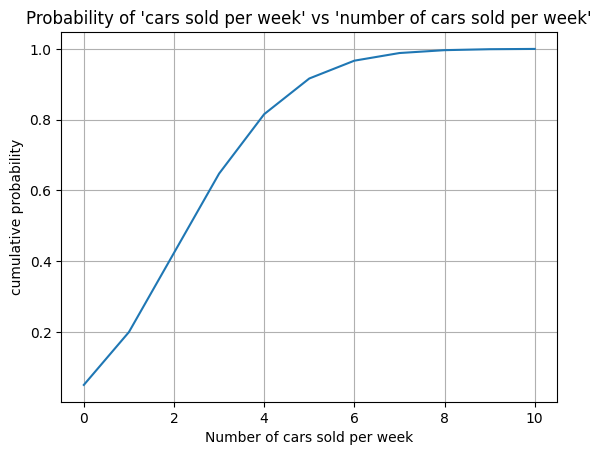

In [109]:
#Question 3C: Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.
import numpy as np
import matplotlib.pyplot as plt

# Generate x values (number of cars sold per week)
x_values = np.arange(0, 11)  # Let's consider up to 10 cars sold

# Calculate the cumulative probabilities for each x value
cumulative_probabilities = poisson.cdf(x_values, average_rate_of_occurance)

# Plot the Poisson distribution function
plt.plot(x_values, cumulative_probabilities)
plt.title("Probability of 'cars sold per week' vs 'number of cars sold per week'")
plt.xlabel('Number of cars sold per week')
plt.ylabel('cumulative probability')
plt.grid(True)
plt.show()

Scenario 4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, 
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the 
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours 
independently place orders with the same bot. Answer the following questions.

In [110]:
# For this scenario we know that the probability will be cumulation of result of either true or false thus we will us binomial functions
probability_of_success = p = 0.868
no_of_trials = no_of_orders = 3

#Question 4A: What is the probability that all three orders will be recognised correctly?
#Anwer: here we need to find the probability of occuring three success independently, thus we will multiply the independent probability
print (f"Answer 4A: The probability that all three orders will be recognized = {.868**3} or by using mass function = {binom.pmf(3,no_of_orders,probability_of_success)}")

#Question 4B: What is the probability that none of the three orders will be recognised correctly?
#Answer: herw wee need to find the probability of each order not getting recognized first, then we need to find the P when the same event occurs trice, for this we will  multiple the (1-p_of_success) 3 times
print (f"Answer 4B: Probability that none of the three orders will be recognized correctly: = {(1-.868)**3}  or by using mass function = {binom.pmf(0,no_of_orders,probability_of_success)}")

#Question 4C: What is the probability that at least two of the three orders will be recognised correctly?
#Answer: herw wee need to find the cumulative probability upto 2 successful occurance, for this we an use cdf function
required_no_of_minimum_success = k = 2
#because cdf function takes required_no_of_maximum_success, and in this case we need required_no_of_minimum_success thus we need first find required_no_of_minimum_success of the orders
#i.e. cumulative probability upto 1 success orders, then reuce it from total possible probability i.e. 1
from scipy.stats import binom
P_for_minimum_of_2_occurance = 1 - binom.cdf(1, no_of_trials, probability_of_success)
print (f"Answer 4C: probability that at least two of the three orders will be recognised correctly: = {P_for_minimum_of_2_occurance}")

Answer 4A: The probability that all three orders will be recognized = 0.653972032 or by using mass function = 0.653972032
Answer 4B: Probability that none of the three orders will be recognized correctly: = 0.0022999680000000003  or by using mass function = 0.002299968
Answer 4C: probability that at least two of the three orders will be recognised correctly: = 0.952327936


CONTEXT: Company X manages the men's top professional basketball division of the American league system. The dataset contains information 
on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many 
times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.
• DATA DESCRIPTION: Basketball.csv - The data set contains information on all the teams so far participated in all the past tournaments.
• DATA DICTIONARY:
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments so far.
12. TeamLaunch: Year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.

• PROJECT OBJECTIVE: Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics 
department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in 
contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV file
basketBallData = pd.read_csv('DS_Part2_Basketball.csv')

# look at a quick view 
print(basketBallData.head(5))


     Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   
2  Team 3          80  3442        2614     1241        598       775   
3  Team 4          82  3386        2664     1187        616       861   
4  Team 5          86  3368        2762     1209        633       920   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4              

In [112]:

basketBallData.describe(include="all")

basketBallData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [113]:
## Data Cleaning
#1. TeamLaunch column
#The TeamLaunch column has inconsistent data , this column shows when the team was launched, it shows year or  year range
#To show year range some places a delimeter of '-' is used, someplace a keyword 'to' is used 
#Clean the data to have single delimeter of '-' instead of 'to' 

#2. Last Row

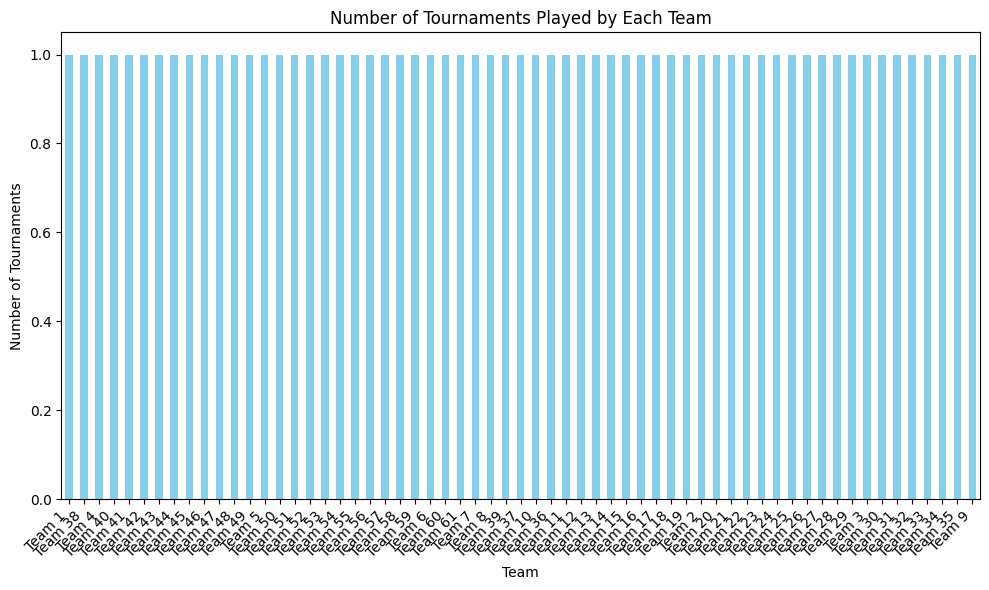

In [115]:
final_dataset = basketBallData

# Grouping the data by team and counting the number of tournaments played
tournaments_played = final_dataset.groupby('Team')['Tournament'].count()

# Sorting the teams based on the number of tournaments played
tournaments_played_sorted = tournaments_played.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
tournaments_played_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Tournaments Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Tournaments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()